# Mount Google drive

In [1]:
import os
from google.colab import drive

In [2]:
# Change the default root directory
try:
  # ugur
  drive.mount('/content/drive')
  os.chdir("drive/MyDrive/Final-Project")
except Exception:
  # mert
  drive.mount('/gdrive')
  os.chdir("/gdrive/My Drive/Notes/NLP/Final-Project/")

Mounted at /content/drive
Mounted at /gdrive


# Import the Libraries

In [3]:
import sys
import pandas as pd
import numpy as np

# Utils

In [4]:
import pickle

In [5]:
def save_model(model, filename):
  pickle_filename = "./code/saved_models/" + filename + ".pkl"
  os.makedirs(os.path.dirname(pickle_filename), exist_ok=True)
  picklefile = open(pickle_filename, 'wb')
  pickle.dump(model, picklefile)
  picklefile.close()

In [6]:
def load_model(model_name):
  pickle_filename = "./code/saved_models/" + model_name + ".pickle"
  picklefile = open(pickle_filename, 'rb')
  model = pickle.load(picklefile)
  picklefile.close()
  return model

# Read the dataset

In [7]:
dataset_path = 'dataset/C50/C50Train.csv'

## Grouped_dataset

**This dataset holds all author text into separate indices.**

author1 = [text1, text2, text3, ..., textN]

author2 = [text1, text2, text3, ..., textN]

author3 = [text1, text2, text3, ..., textN]

In [8]:
df_dataset = pd.read_csv(dataset_path)

In [9]:
grouped_dataset = df_dataset.groupby("author")["texts"].apply(list)

In [10]:
grouped_dataset[:10]

author
AaronPressman       [The U.S. Postal Service announced Wednesday a...
AlanCrosby          [Shares on most central and eastern European b...
AlexanderSmith      [Cable and telecoms giants Cable &amp; Wireles...
BenjaminKangLim     [China's flamboyant tycoon Mou Qizhong is houn...
BernardHickey       [Media magnate Rupert Murdoch said on Tuesday ...
BradDorfman         [Mercantile Bancorp Inc's planned $1.07 billio...
DarrenSchuettler    [Anti-government protests swept across Canada'...
DavidLawder         [General Motors Corp. workers remained on the ...
EdnaFernandes       [The UK construction industry expects to get t...
EricAuchard         [Intel Corp stock surged on Tuesday, lifted by...
Name: texts, dtype: object

## Merged_dataset

**In this version of the dataset, all author texts are combined into one single long array.**

author1 = [text1 + text2 + text3 + ... + textN]

author2 = [text1 + text2 + text3 + ... + textN]

author3 = [text1 + text2 + text3 + ... + textN]

In [11]:
def combine_elements(arr):
  for i in range(len(arr)):
    corpora = ''
    for corpus in arr:
      corpora += corpus
  return corpora

In [12]:
merged_dataset = grouped_dataset.copy()

In [13]:
for i in range(merged_dataset.size):
  merged_dataset[i] = combine_elements(merged_dataset[i])

In [14]:
merged_dataset['AaronPressman']

'The U.S. Postal Service announced Wednesday a plan to boost online commerce by enhancing the security and reliability of electronic mail traveling on the Internet.Under the plan, businesses and consumers can verify that e-mail has not been tampered with and use services now available for ordinary mail like sending a certified letter."The leap from trading messages to buying and selling goods has been blocked by the fear of security threats," Robert Reisner, vice president of stategic planning, said.  "To expand from local area networks and bilateral secure communications to wide use of electronic commerce will require a new generation of security services," Reisner said.Cylink Corp is developing a system for the Post Office to use to verify the identity of e-mail senders. The system will enable people to register a digital "signature" with the Post Office that can be compared against electronic mail they send.If any tampering is discovered, the Postal Service would investigate, just l

# Preprocessing

In [15]:
import re

In [16]:
import nltk
nltk.download('stopwords')
!pip install text_preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [18]:
from text_preprocessing import preprocess_text, remove_stopword
from text_preprocessing import to_lower, remove_email, remove_url, lemmatize_word, remove_punctuation, check_spelling, expand_contraction, remove_name, remove_number, remove_special_character, remove_punctuation, remove_whitespace, normalize_unicode, remove_stopword, preprocess_text

In [19]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [20]:
def clean_text(text, remove_stopwords=True, remove_whitespaces=False):
  preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation, lemmatize_word, check_spelling, expand_contraction, remove_name, remove_stopword]
  # text = preprocess_text(text, preprocess_functions)

  # Convert words to lower case
  # text = text.lower()
  
  # Replace contractions with their longer forms 
  if True:
      text = text.split()
      new_text = []
      for word in text:
          if word in contractions:
              new_text.append(contractions[word])
          else:
              new_text.append(word)
      text = " ".join(new_text)
  
  # Format words and remove unwanted characters
  text = re.sub(r'&amp;', '', text) 
  text = re.sub(r'0,0', '00', text) 
  text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
  text = re.sub(r'\'', ' ', text)
  text = re.sub(r'\$', ' $ ', text)
  text = re.sub(r'j k ', ' jk ', text)
  text = re.sub(r' s ', ' ', text)
  text = re.sub(r' yr ', ' year ', text)
  text = re.sub(r' l g b t ', ' lgbt ', text)
  if remove_whitespaces:
    text = re.sub(r' ', '', text)
  
  # Optionally, remove stop words
  if remove_stopwords:
      text = text.split()
      stops = set(stopwords.words("english"))
      text = [w for w in text if not w in stops]
      text = " ".join(text)
  return text

# Models

## Ngram

In [21]:
from nltk import ngrams
from nltk import word_tokenize, ngrams
from nltk import sent_tokenize, word_tokenize, pos_tag

In [22]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Character Level Text Ngram

In [23]:
class CharLevelTextNgram:
  def __init__(self, dataset):
    self.dataset = dataset.copy()
    self.author_profiles = None

  def __preprocess_text_array(self, text_array):
    dataset_len = len(text_array)
    for i in range(dataset_len):
      text = self.__preprocess_text(text_array[i])
      text_array.iloc[i] = text
    return text_array

  def __preprocess_text(self, text):
    return clean_text(text, remove_whitespaces=True)

  def __create_author_profiles(self, dataset, n, L):
    for i in range(len(dataset)):
      dataset[i] = self.__create_author_profile(dataset[i], n, L)
    return dataset

  def __create_author_profile(self, text, n, L):
    cleaned_text = self.__preprocess_text(text)
    df_ngram = ngrams(cleaned_text, n)
    ngram_distribution = nltk.FreqDist(df_ngram)
    normalized_distribution = self.__normalize_author_profile(ngram_distribution)
    return ngram_distribution.most_common(L)

  def __normalize_author_profile(self, frequence_distribution):
    total = frequence_distribution.N()
    for word in frequence_distribution:
      frequence_distribution[word] /= float(total)
    return frequence_distribution

  def __list_to_dict(self, list):
    dictionary = {}
    for index in range(len(list)):
      key = list[index][0]
      dictionary[key] = list[index][1]
    return dictionary

  def __get_union(self, keys1, keys2):
    dictionary = {}
    for key in keys1:
      if key not in dictionary.keys():
        dictionary[key] = True

    for key in keys2:
      if key not in dictionary.keys():
        dictionary[key] = True
    return dictionary

  def __calculate_dissimilarity(value1, value2):
    return ((2*(value1 - value2))/(value1 + value2))**2

  def __find_most_similar_profile(self, training_author_profiles, author_profile):
    similarity_score = sys.maxsize
    most_similar_author = 0
    
    n_profiles = len(self.author_profiles)

    test_profile = self.__list_to_dict(author_profile)
    keys1 = test_profile.keys()
    for i in range(n_profiles):
      author_profile = self.__list_to_dict(self.author_profiles[i])
      keys2 = author_profile.keys()

      keys = self.__get_union(keys1, keys2)

      sum = 0
      for key in keys:
        value1, value2 = 0,0
        try:
          value1 = test_profile[key]
        except Exception:
          pass

        try:
          value2 = author_profile[key]
        except Exception:
          pass

        sum += self.__calculate_dissimilarity(value1, value2)

      if sum < similarity_score:
        similarity_score = sum
        index = i
    return index, self.dataset.index[index]

  def __calculate_dissimilarity(self, value1, value2):
    return ((2*(value1 - value2))/(value1 + value2))**2

  def fit(self, n, L):
    self.n, self.L = n, L
    self.cleaned_dataset = self.__preprocess_text_array(self.dataset)
    self.author_profiles = self.__create_author_profiles(self.cleaned_dataset, n, L)

  def predict(self, text):
    cleaned_text = self.__preprocess_text(text)
    author_profile = self.__create_author_profile(text, self.n, self.L)
    return self.__find_most_similar_profile(self.author_profiles, author_profile)

  def evaluate(self, X, y):
    return True

  def save(self):
    return True

In [24]:
charLevelTextNgram = CharLevelTextNgram(dataset=merged_dataset)

In [25]:
charLevelTextNgram.fit(n=3, L=30)

In [26]:
charLevelTextNgram.predict('ugur')

(0, 'AaronPressman')

In [27]:
save_model(charLevelTextNgram, 'NGRAM/WRD')

### Word Level POS Ngram

In [28]:
class WordLevelPOSNgram:
  def __init__(self, dataset):
    self.dataset = dataset.copy()
    self.author_profiles = None

  def __preprocess_text_array(self, text_array):
    dataset_len = len(text_array)
    for i in range(dataset_len):
      text = self.__preprocess_text(text_array[i])
      text_array.iloc[i] = text
    return text_array

  def __preprocess_text(self, text):
    return clean_text(text, remove_whitespaces=False)

  def __create_author_profiles(self, dataset, n, L):
    for i in range(len(dataset)):
      dataset[i] = self.__create_author_profile(dataset[i], n, L)
    return dataset

  def __create_author_profile(self, text, n, L):
    cleaned_text = self.__preprocess_text(text)
    pos_tags = pos_tag(word_tokenize(cleaned_text))
    pos_tags = [tag[1] for tag in pos_tags]
    df_ngram = ngrams(pos_tags, n)
    ngram_distribution = nltk.FreqDist(df_ngram)
    normalized_distribution = self.__normalize_author_profile(ngram_distribution)
    return ngram_distribution.most_common(L)

  def __normalize_author_profile(self, frequence_distribution):
    total = frequence_distribution.N()
    for word in frequence_distribution:
      frequence_distribution[word] /= float(total)
    return frequence_distribution

  def __list_to_dict(self, list):
    dictionary = {}
    for index in range(len(list)):
      key = list[index][0]
      dictionary[key] = list[index][1]
    return dictionary

  def __get_union(self, keys1, keys2):
    dictionary = {}
    for key in keys1:
      if key not in dictionary.keys():
        dictionary[key] = True

    for key in keys2:
      if key not in dictionary.keys():
        dictionary[key] = True
    return dictionary

  def __calculate_dissimilarity(value1, value2):
    return ((2*(value1 - value2))/(value1 + value2))**2

  def __find_most_similar_profile(self, training_author_profiles, author_profile):
    similarity_score = sys.maxsize
    most_similar_author = 0
    
    n_profiles = len(self.author_profiles)

    test_profile = self.__list_to_dict(author_profile)
    keys1 = test_profile.keys()
    for i in range(n_profiles):
      author_profile = self.__list_to_dict(self.author_profiles[i])
      keys2 = author_profile.keys()

      keys = self.__get_union(keys1, keys2)

      sum = 0
      for key in keys:
        value1, value2 = 0,0
        try:
          value1 = test_profile[key]
        except Exception:
          pass

        try:
          value2 = author_profile[key]
        except Exception:
          pass

        sum += self.__calculate_dissimilarity(value1, value2)

      if sum < similarity_score:
        similarity_score = sum
        index = i
    return index, self.dataset.index[index]

  def __calculate_dissimilarity(self, value1, value2):
    return ((2*(value1 - value2))/(value1 + value2))**2

  def fit(self, n, L):
    self.n, self.L = n, L
    self.cleaned_dataset = self.__preprocess_text_array(self.dataset)
    self.author_profiles = self.__create_author_profiles(self.cleaned_dataset, n, L)

  def predict(self, text):
    cleaned_text = self.__preprocess_text(text)
    author_profile = self.__create_author_profile(text, self.n, self.L)
    return self.__find_most_similar_profile(self.author_profiles, author_profile)

  def evaluate(self, X, y):
    return True

  def save(self):
    return True


In [29]:
wordLevelPOSNgram = WordLevelPOSNgram(dataset=merged_dataset)

In [30]:
wordLevelPOSNgram.fit(n=3, L=30)

In [31]:
wordLevelPOSNgram.predict(merged_dataset[43])

(43, 'ScottHillis')

In [32]:
save_model(wordLevelPOSNgram, 'NGRAM/POS')

## Bag of Words

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
training_path = 'dataset/C50/C50Train.csv'
test_path = 'dataset/C50/C50test.csv'

In [35]:
dfTrain = pd.read_csv(training_path)
dfTest = pd.read_csv(test_path)

In [36]:
dfTrain["texts"] = dfTrain["texts"].apply(lambda x: clean_text(x, remove_whitespaces=False))
dfTest["text"] = dfTest["text"].apply(lambda x: clean_text(x, remove_whitespaces=False))

In [37]:
X_train, y_train = dfTrain["texts"], dfTrain["author"]
X_test, y_test = dfTest["text"], dfTest["author"]

### Direct BOW Model

In [38]:
class Direct_BOW_Model:  
  def __init__(self, model):
    self.models = {
        'SVC': LinearSVC(),
        'RF': RandomForestClassifier(),
        'MNB': MultinomialNB()       
    }
    self.model = self.models[model]
    self.bow_transformer = None

  def fit(self, X_train, y_train):
    self.bow_transformer = CountVectorizer().fit(X_train)
    text_bow_train = self.bow_transformer.transform(X_train)
    self.model.fit(text_bow_train, y_train)

  def predict(self, text):
    return self.model.predict(self.bow_transformer.transform([clean_text(text, remove_whitespaces=False)]))[0]

  def evaluate(self, X, y):
    text_bow_X = self.bow_transformer.transform(X)
    return self.model.score(text_bow_X, y)

#### LinearSVC

In [39]:
model_linearSVC = Direct_BOW_Model('SVC')

In [40]:
model_linearSVC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
model_linearSVC.evaluate(X_train, y_train)

1.0

In [42]:
model_linearSVC.evaluate(X_test, y_test)

0.6776

In [43]:
model_linearSVC.predict('This is a test message')

'AaronPressman'

In [44]:
save_model(model_linearSVC, 'BASIC-BOW/SVC')

#### RandomForestClassifier

In [45]:
model_randomForest = Direct_BOW_Model('RF')

In [46]:
model_randomForest.fit(X_train, y_train)

In [47]:
model_randomForest.evaluate(X_train, y_train)

1.0

In [48]:
model_randomForest.evaluate(X_test, y_test)

0.6476

In [49]:
model_randomForest.predict('This is a test message')

'TimFarrand'

In [50]:
save_model(model_linearSVC, 'BASIC-BOW/RF')

#### MultinomialNB

In [51]:
model_multinomialNB = Direct_BOW_Model('MNB')

In [52]:
model_multinomialNB.fit(X_train, y_train)

In [53]:
model_multinomialNB.evaluate(X_train, y_train)

0.976

In [54]:
model_multinomialNB.evaluate(X_test, y_test)

0.6628

In [55]:
model_multinomialNB.predict('This is a test message')

'PatriciaCommins'

In [56]:
save_model(model_linearSVC, 'BASIC-BOW/MNB')

### BOW_TFIDF_Model

In [57]:
class TfIdf_BOW_Model:  
  def __init__(self, model):
    self.models = {
        'SVC': LinearSVC(),
        'RF': RandomForestClassifier(),
        'MNB': MultinomialNB()       
    }
    self.model = text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', self.models[model] ),
    ])

  def fit(self, X_train, y_train):
    self.model.fit(X_train, y_train)

  def predict(self, text):
    return self.model.predict([clean_text(text, remove_whitespaces=False)])[0]

  def evaluate(self, X, y):
    predicted = self.model.predict(X)
    return classification_report(y, predicted)

#### LinearSVC

In [58]:
model_linearSVC = TfIdf_BOW_Model('SVC')

In [59]:
model_linearSVC.fit(X_train, y_train)

In [60]:
model_linearSVC.predict('asdasd')

'PatriciaCommins'

In [61]:
report = model_linearSVC.evaluate(X_test, y_test)
print(report)

                   precision    recall  f1-score   support

    AaronPressman       0.86      0.96      0.91        50
       AlanCrosby       0.84      0.54      0.66        50
   AlexanderSmith       0.50      0.30      0.37        50
  BenjaminKangLim       0.32      0.26      0.29        50
    BernardHickey       0.86      0.60      0.71        50
      BradDorfman       0.63      0.94      0.75        50
 DarrenSchuettler       0.48      0.28      0.35        50
      DavidLawder       0.65      0.48      0.55        50
    EdnaFernandes       0.97      0.58      0.72        50
      EricAuchard       0.40      0.44      0.42        50
   FumikoFujisaki       0.96      1.00      0.98        50
   GrahamEarnshaw       0.73      0.92      0.81        50
 HeatherScoffield       0.35      0.44      0.39        50
       JanLopatka       0.61      0.40      0.48        50
    JaneMacartney       0.26      0.24      0.25        50
     JimGilchrist       0.89      1.00      0.94       

In [62]:
save_model(model_linearSVC, 'TF-IDF-BOW/SVC')

#### RandomForestClassifier

In [63]:
model_randomForest = TfIdf_BOW_Model('RF')

In [64]:
model_randomForest.fit(X_train, y_train)

In [65]:
model_randomForest.predict('asdasd')

'AaronPressman'

In [66]:
report = model_randomForest.evaluate(X_test, y_test)
print(report)

                   precision    recall  f1-score   support

    AaronPressman       0.81      0.96      0.88        50
       AlanCrosby       0.92      0.44      0.59        50
   AlexanderSmith       0.52      0.46      0.49        50
  BenjaminKangLim       0.31      0.46      0.37        50
    BernardHickey       0.52      0.30      0.38        50
      BradDorfman       0.64      0.68      0.66        50
 DarrenSchuettler       0.26      0.28      0.27        50
      DavidLawder       0.45      0.18      0.26        50
    EdnaFernandes       0.66      0.38      0.48        50
      EricAuchard       0.57      0.48      0.52        50
   FumikoFujisaki       0.86      1.00      0.93        50
   GrahamEarnshaw       0.70      0.92      0.79        50
 HeatherScoffield       0.32      0.40      0.35        50
       JanLopatka       0.52      0.66      0.58        50
    JaneMacartney       0.25      0.08      0.12        50
     JimGilchrist       0.94      1.00      0.97       

In [67]:
save_model(model_randomForest, 'TF-IDF-BOW/RF')

#### MultinomialNB

In [68]:
model_multinomialNB = TfIdf_BOW_Model('MNB')

In [69]:
model_multinomialNB.fit(X_train, y_train)

In [70]:
model_multinomialNB.predict('asdasd')

'AaronPressman'

In [71]:
report = model_multinomialNB.evaluate(X_test, y_test)
print(report)

                   precision    recall  f1-score   support

    AaronPressman       0.90      0.90      0.90        50
       AlanCrosby       0.96      0.54      0.69        50
   AlexanderSmith       0.93      0.26      0.41        50
  BenjaminKangLim       0.31      0.30      0.30        50
    BernardHickey       0.71      0.68      0.69        50
      BradDorfman       0.60      0.80      0.68        50
 DarrenSchuettler       0.64      0.28      0.39        50
      DavidLawder       0.38      0.48      0.42        50
    EdnaFernandes       0.90      0.38      0.54        50
      EricAuchard       0.43      0.36      0.39        50
   FumikoFujisaki       0.75      1.00      0.85        50
   GrahamEarnshaw       0.61      0.92      0.73        50
 HeatherScoffield       0.35      0.44      0.39        50
       JanLopatka       0.56      0.54      0.55        50
    JaneMacartney       0.22      0.28      0.24        50
     JimGilchrist       0.88      1.00      0.93       

In [72]:
save_model(model_multinomialNB, 'TF-IDF-BOW/MNB')

## Style-Based

In [73]:
import string
import seaborn as sns

In [74]:
stopword = set(stopwords.words('english'))
stopword_af = stopword

In [75]:
!pip install afinn
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [76]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [77]:
ps=PorterStemmer()

### Features

In [78]:
auth_files_ls = []
for i in range(len(merged_dataset)):
  txt = merged_dataset[i]
  #Feat 1: total number of sentences
  total_sents = len(nltk.sent_tokenize(txt))
  #Feat 2: total number of words (raw)
  total_tokens_raw = len(nltk.word_tokenize(txt))
  #Feat 3:total no. of tokens (words) when all words in lower case
  total_tokens_lower = len(nltk.word_tokenize(txt.lower()))
  # Feat 4: Total unique no; of words in lower case
  unique_tokens_lower = len(set(nltk.word_tokenize(txt.lower())))
  # Feat 5:Total unique no; of tokens in lower case & stemmed
  unique_tokens_lower_stem = len(set([ps.stem(w) for w in nltk.word_tokenize(txt.lower())]))
  # Feat 6: Total unique no; of tokens in lower case + stemmed - stopwords
  tokens_lower_stem_sword= len(set([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if ps.stem(w) not in stopword_af]))
  # Feat 7: total counts of all stopwords (duplicate also considered)
  stopw_count=len([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w in stopword_af ])
  # Feat 8:Total no; of punctuations 
  total_puncts = len([char for char in txt if char in string.punctuation])
  # Feat 9:Total nouns in lower+stemmed tokens
  lower_stem_ls=[ps.stem(w) for w in nltk.word_tokenize(txt.lower())]
  nouns=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['NN','NNS','NNP','NNPS']])
  #Feat 10:Total verbs in lower+stemmed tokens
  verbs=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']])
  #Feat 11:Average words per sentence
  avg_words=len(re.split('[\s]',txt))/len(nltk.sent_tokenize(txt))
  #Feat 12:Average words length (lower case + stemmed - stop words)
  lower_sword_ls = [word for word in (nltk.word_tokenize(txt.lower())) if word not in stopword_af]
  avg_word_len=sum([len(w) for w in lower_sword_ls])/len(lower_sword_ls)
  #Feat 13 :Sentiment score 
  lower_stem_sword=[ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w not in stopword_af]
  auth_files_ls.append({
      'total_sents': total_sents,
      'total_tokens_raw': total_tokens_raw,
      'total_tokens_lower': total_tokens_lower,
      'unique_tokens_lower': unique_tokens_lower,
      'unique_tokens_lower_stem': unique_tokens_lower_stem,
      'tokens_lower_stem_sword':tokens_lower_stem_sword,
      'stopw_count':stopw_count,
      'total_puncts':total_puncts,
      'nouns':nouns,
      'verbs':verbs,
      'avg_words':avg_words,
      'avg_word_len':avg_word_len,
      'author':merged_dataset.index[i]
  })

In [79]:
auth_df = pd.DataFrame(auth_files_ls)

In [80]:
auth_df.head()

,total_sents,total_tokens_raw,total_tokens_lower,unique_tokens_lower,unique_tokens_lower_stem,tokens_lower_stem_sword,stopw_count,total_puncts,nouns,verbs,avg_words,avg_word_len,author
0,529,24860,24859,3640,2818,2725,8374,3884,8192,3075,41.321361,6.006794,AaronPressman
1,312,24457,24453,3629,3094,3000,8271,4404,7553,2700,71.320513,5.620442,AlanCrosby
2,517,31903,31897,4360,3455,3361,11534,4805,9651,4179,54.549323,5.786967,AlexanderSmith
3,412,27674,27663,4229,3446,3350,9748,4423,9154,3387,59.652913,5.880100,BenjaminKangLim
4,504,26196,26191,3167,2607,2515,8963,4364,7601,3220,45.013889,5.462329,BernardHickey


### Preprocessing

In [81]:
import matplotlib.pyplot as plt

In [82]:
new_df=auth_df.drop(['author'],axis=1)

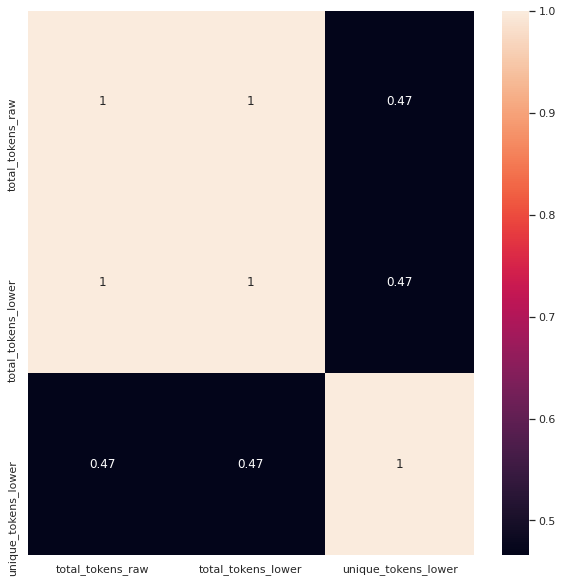

In [83]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(new_df[['total_tokens_raw','total_tokens_lower','unique_tokens_lower']].corr(), annot=True)

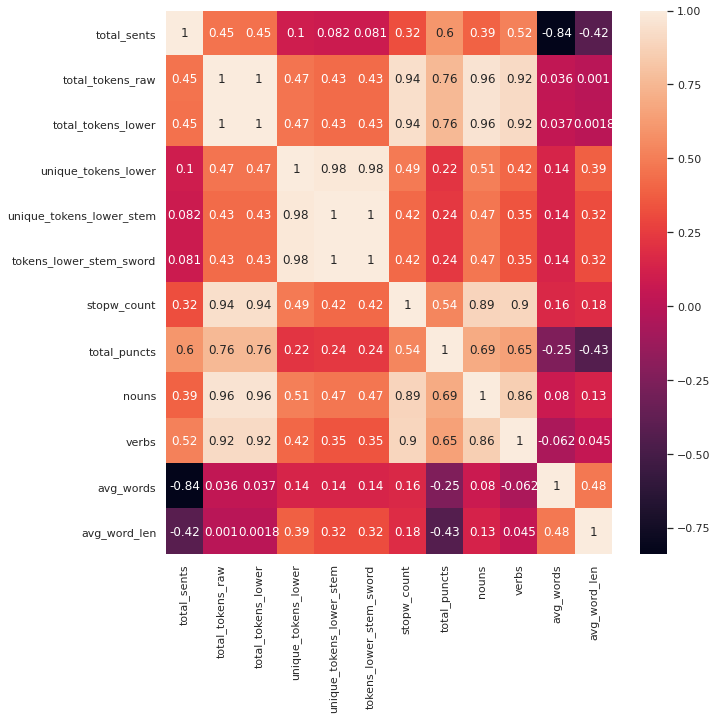

In [84]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True)

In [85]:
new_df[['total_tokens_raw','total_tokens_lower','unique_tokens_lower','tokens_lower_stem_sword']].corr()

,total_tokens_raw,total_tokens_lower,unique_tokens_lower,tokens_lower_stem_sword
total_tokens_raw,1.000000,0.999997,0.466609,0.428366
total_tokens_lower,0.999997,1.000000,0.466706,0.428282
unique_tokens_lower,0.466609,0.466706,1.000000,0.984110
tokens_lower_stem_sword,0.428366,0.428282,0.984110,1.000000


In [86]:
auth_trail1=auth_df.copy()

In [87]:
auth_trail1.drop(['total_tokens_raw','total_tokens_lower'],axis=1,inplace=True)

In [88]:
auth_trail1.drop(['tokens_lower_stem_sword'],axis=1,inplace=True)

In [89]:
auth_trail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_sents               50 non-null     int64  
 1   unique_tokens_lower       50 non-null     int64  
 2   unique_tokens_lower_stem  50 non-null     int64  
 3   stopw_count               50 non-null     int64  
 4   total_puncts              50 non-null     int64  
 5   nouns                     50 non-null     int64  
 6   verbs                     50 non-null     int64  
 7   avg_words                 50 non-null     float64
 8   avg_word_len              50 non-null     float64
 9   author                    50 non-null     object 
dtypes: float64(2), int64(7), object(1)
memory usage: 4.0+ KB


### Model

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [91]:
X=auth_trail1.drop(['author'],axis=1)
y=auth_trail1['author']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [93]:
type(y_train)

pandas.core.series.Series

In [94]:
rf=RandomForestClassifier()

In [95]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred = rf.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.0

In [98]:
save_model(rf, 'STYLE-BASED/RF')